<a href="https://colab.research.google.com/github/lanayurkevych96/hello-universe/blob/main/Quatro(class).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import polars as pl


In [ ]:
gapminder_france_1982 = (gapminder
    .filter(
        pl.col("country") == "France",
        pl.col("year") == 1982
)
)


NameError: name 'gapminder' is not defined

In [ ]:
(gapminder
 .with_columns(gdp_total = pl.col(gdpPercap) * pl.col("pop"))
 )

NameError: name 'gapminder' is not defined

In [ ]:
(gapminder
  .with_columns(gdp_total = pl.col("pop") * pl.col("gdpPercap"))
)


NameError: name 'gapminder' is not defined

In [ ]:
(gapminder
  .with_columns(gdp_total = pl.col("pop") * pl.col("gdpPercap"))
)


shape: (1_704, 7)
┌─────────────┬───────────┬──────┬─────────┬──────────┬────────────┬───────────┐
│ country     ┆ continent ┆ year ┆ lifeExp ┆ pop      ┆ gdpPercap  ┆ gdp_total │
│ ---         ┆ ---       ┆ ---  ┆ ---     ┆ ---      ┆ ---        ┆ ---       │
│ str         ┆ str       ┆ i64  ┆ f64     ┆ i64      ┆ f64        ┆ f64       │
╞═════════════╪═══════════╪══════╪═════════╪══════════╪════════════╪═══════════╡
│ Afghanistan ┆ Asia      ┆ 1952 ┆ 28.801  ┆ 8425333  ┆ 779.445314 ┆ 6.5671e9  │
│ Afghanistan ┆ Asia      ┆ 1957 ┆ 30.332  ┆ 9240934  ┆ 820.85303  ┆ 7.5854e9  │
│ Afghanistan ┆ Asia      ┆ 1962 ┆ 31.997  ┆ 10267083 ┆ 853.10071  ┆ 8.7589e9  │
│ Afghanistan ┆ Asia      ┆ 1967 ┆ 34.02   ┆ 11537966 ┆ 836.197138 ┆ 9.6480e9  │
│ Afghanistan ┆ Asia      ┆ 1972 ┆ 36.088  ┆ 13079460 ┆ 739.981106 ┆ 9.6786e9  │
│ …           ┆ …         ┆ …    ┆ …       ┆ …        ┆ …          ┆ …         │
│ Zimbabwe    ┆ Africa    ┆ 1987 ┆ 62.351  ┆ 9216418  ┆ 706.157306 ┆ 6.5082e9  │
│ Zimbabwe    ┆ Africa    ┆ 1992 ┆ 60.377  ┆ 10704340 ┆ 693.420786 ┆ 7.4226e9  │
│ Zimbabwe    ┆ Africa    ┆ 1997 ┆ 46.809  ┆ 11404948 ┆ 792.44996  ┆ 9.0379e9  │
│ Zimbabwe    ┆ Africa    ┆ 2002 ┆ 39.989  ┆ 11926563 ┆ 672.038623 ┆ 8.0151e9  │
│ Zimbabwe    ┆ Africa    ┆ 2007 ┆ 43.487  ┆ 12311143 ┆ 469.709298 ┆ 5.7827e9  │
└─────────────┴───────────┴──────┴─────────┴──────────┴────────────┴───────────┘

In [ ]:
gapminder_upper = (gapminder
  .with_columns(country_upper = pl.col("country").str.to_uppercase())
)


In [ ]:
gapminder = pl.read_csv("https://raw.githubusercontent.com/damien-dupre/damien-dupre.github.io/refs/heads/main/gapminder.csv")



In [ ]:
(gapminder
  .select(pl.col("pop").mean())
)


shape: (1, 1)
┌──────────┐
│ pop      │
│ ---      │
│ f64      │
╞══════════╡
│ 2.9601e7 │
└──────────┘

In [ ]:
(gapminder
  .select(pl.col("pop").mean().alias("pop_average"))
)


shape: (1, 1)
┌─────────────┐
│ pop_average │
│ ---         │
│ f64         │
╞═════════════╡
│ 2.9601e7    │
└─────────────┘

In [ ]:
(gapminder
  .select(pl.col("pop").mean().alias("pop_average"))
)


shape: (1, 1)
┌─────────────┐
│ pop_average │
│ ---         │
│ f64         │
╞═════════════╡
│ 2.9601e7    │
└─────────────┘

In [ ]:
(gapminder
  .group_by(pl.col("year"))
  .agg(pl.col("pop").mean().alias("pop_average"))
)


shape: (12, 2)
┌──────┬─────────────┐
│ year ┆ pop_average │
│ ---  ┆ ---         │
│ i64  ┆ f64         │
╞══════╪═════════════╡
│ 1972 ┆ 2.5190e7    │
│ 1957 ┆ 1.8763e7    │
│ 1982 ┆ 3.0207e7    │
│ 1962 ┆ 2.0421e7    │
│ 1967 ┆ 2.2658e7    │
│ …    ┆ …           │
│ 1977 ┆ 2.7676e7    │
│ 1952 ┆ 1.6950e7    │
│ 2007 ┆ 4.4021e7    │
│ 1987 ┆ 3.3039e7    │
│ 1992 ┆ 3.5991e7    │
└──────┴─────────────┘

In [ ]:
(gapminder
  .group_by(
    pl.col("year"), pl.col("continent")
    ).agg(pl.col("pop").std().alias("pop_std"))
)

shape: (60, 3)
┌──────┬───────────┬──────────┐
│ year ┆ continent ┆ pop_std  │
│ ---  ┆ ---       ┆ ---      │
│ i64  ┆ str       ┆ f64      │
╞══════╪═══════════╪══════════╡
│ 1987 ┆ Africa    ┆ 1.5277e7 │
│ 2002 ┆ Americas  ┆ 6.5602e7 │
│ 2002 ┆ Oceania   ┆ 1.1058e7 │
│ 1997 ┆ Americas  ┆ 6.2033e7 │
│ 1982 ┆ Americas  ┆ 5.1294e7 │
│ …    ┆ …         ┆ …        │
│ 1952 ┆ Oceania   ┆ 4.7351e6 │
│ 1992 ┆ Asia      ┆ 2.4496e8 │
│ 1977 ┆ Europe    ┆ 2.0561e7 │
│ 1972 ┆ Oceania   ┆ 7.2464e6 │
│ 2002 ┆ Europe    ┆ 2.3224e7 │
└──────┴───────────┴──────────┘

In [ ]:
table_1 = (gapminder
  .select(pl.col("country"), pl.col("year"), pl.col("pop"))
)
table_2 = (gapminder
  .select(pl.col("country"), pl.col("year"), pl.col("lifeExp"))
)


In [ ]:
table_right_joined = (table_1
  .join(table_2, on = "country", how = "right")
)


In [ ]:
table_right_joined = (table_1
  .join(table_2, on = "country", how = "right")
)


In [ ]:
table_full_joined = (table_1
  .join(table_2, on = ["country", "year"], how = "full")
)


In [ ]:
from plotnine import *

In [ ]:
import polars as pl
gapminder=pl.read_csv("https://raw.githubusercontent.com/damien-dupre/damien-dupre.github.io/refs/heads/main/gapminder.csv")

In [ ]:
import polars as pl
gapminder=pl.read_csv("https://raw.githubusercontent.com/damien-dupre/damien-dupre.github.io/refs/heads/main/gapminder.csv")

SyntaxError: unterminated string literal (detected at line 363) (<ipython-input-10-fec41f77c9ca>, line 363)

(ggplot(data=my_dataframe) # the argument name can be omitted too
)


In [ ]:
from plotnine import *

In [1]:
(ggploimport polars as pl
gapminder=pl.read_csv("https://raw.githubusercontent.com/damien-dupre/damien-dupre.github.io/refs/heads/main/gapminder.csv")t(data=gapminder) # or ggplot(gapminder)
)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-1-df546cbdda44>, line 1)

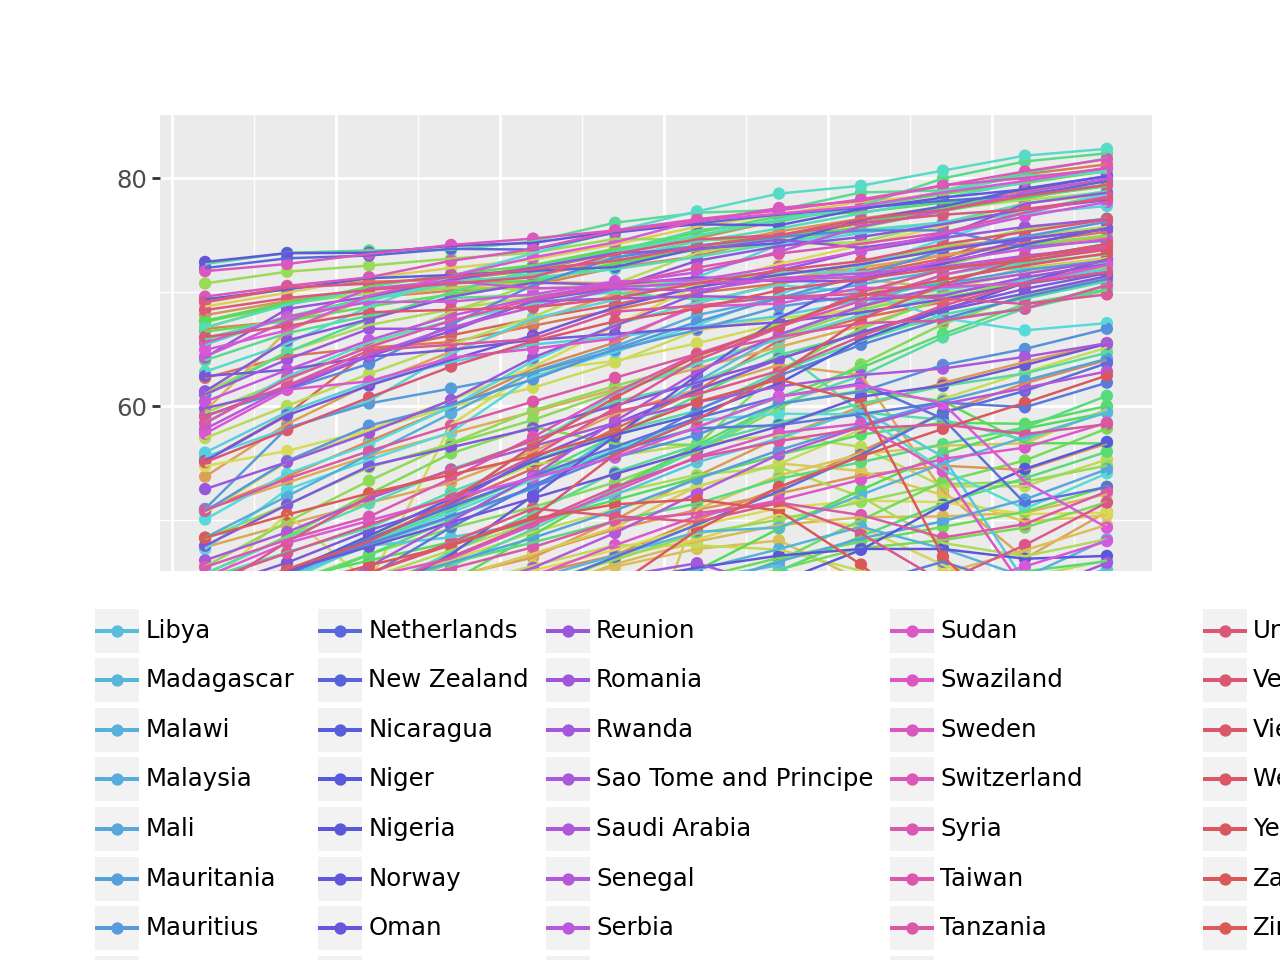

In [ ]:
(ggplot(gapminder, aes(x="year", y="lifeExp", color="country"))
  + geom_point()
  + geom_line()
)

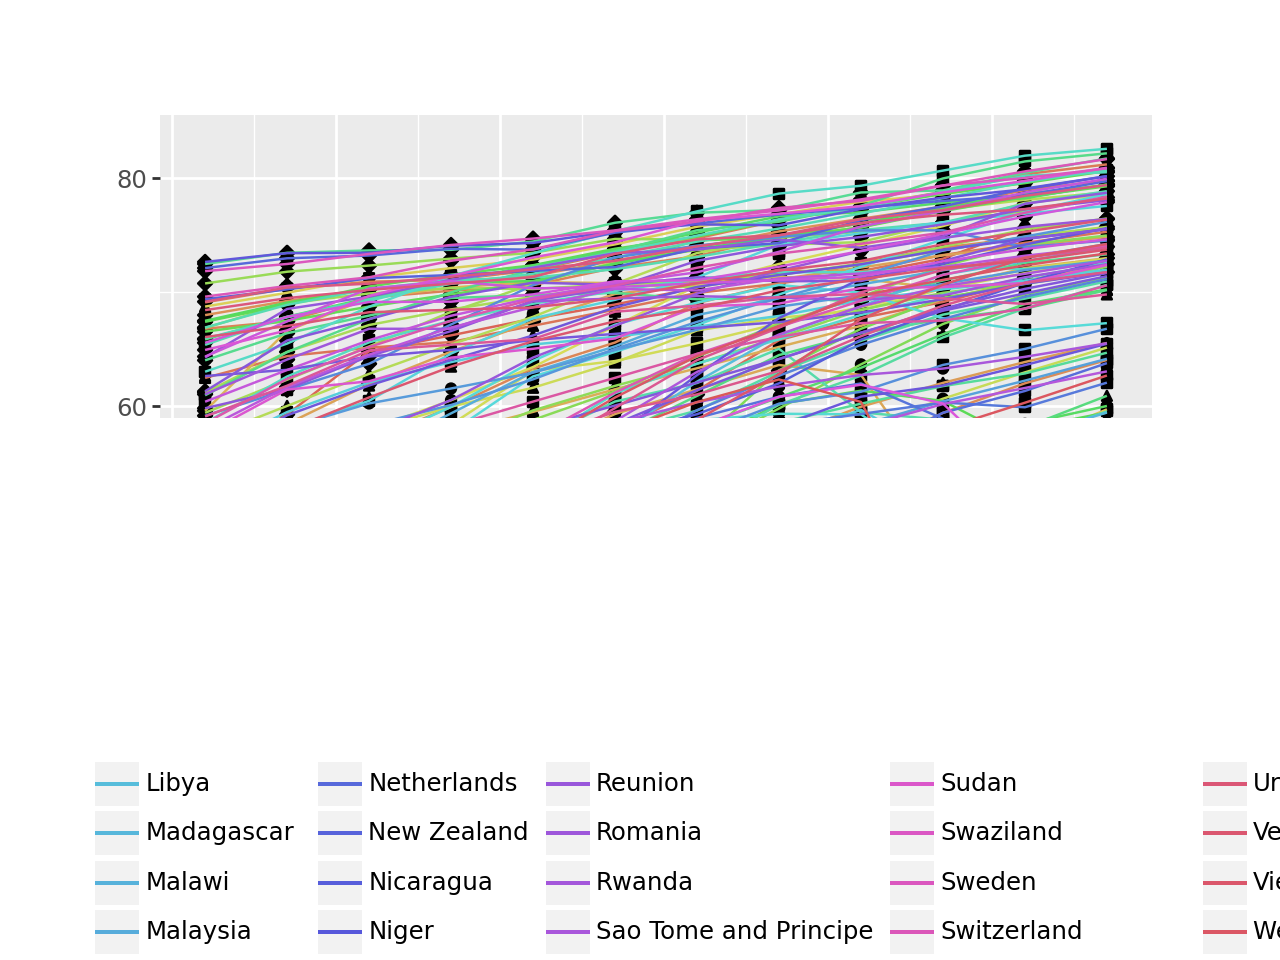

In [ ]:
(ggplot(gapminder)
  + geom_point(aes(x="year", y="lifeExp", shape="continent"))
  + geom_line(aes(x="year", y="lifeExp", color="country"))
)

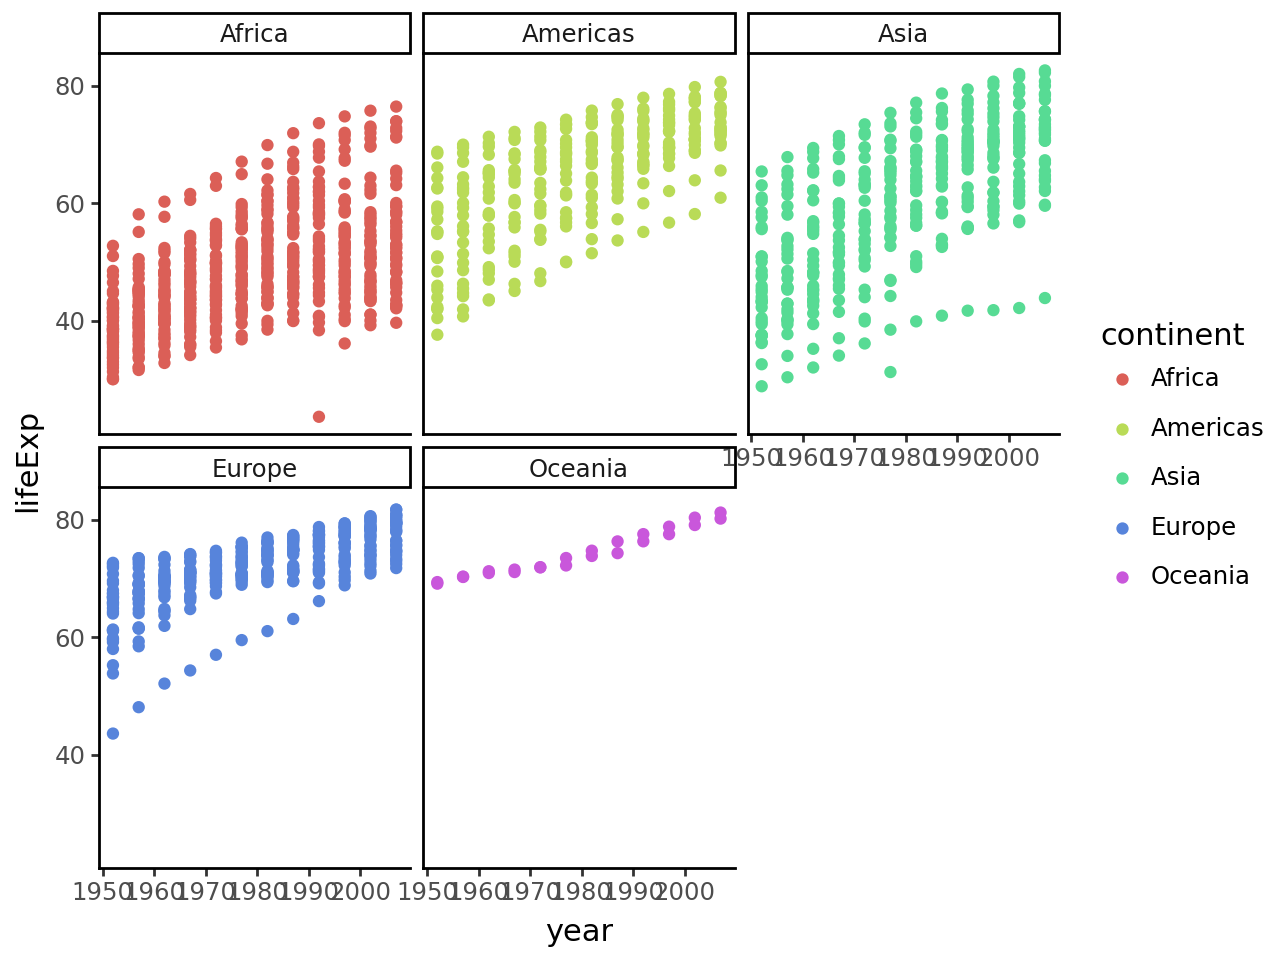

In [ ]:
(ggplot(gapminder)
  + aes(x="year", y="lifeExp", color="continent")
  + geom_point()
  + facet_wrap("continent")
  + theme_classic()
)

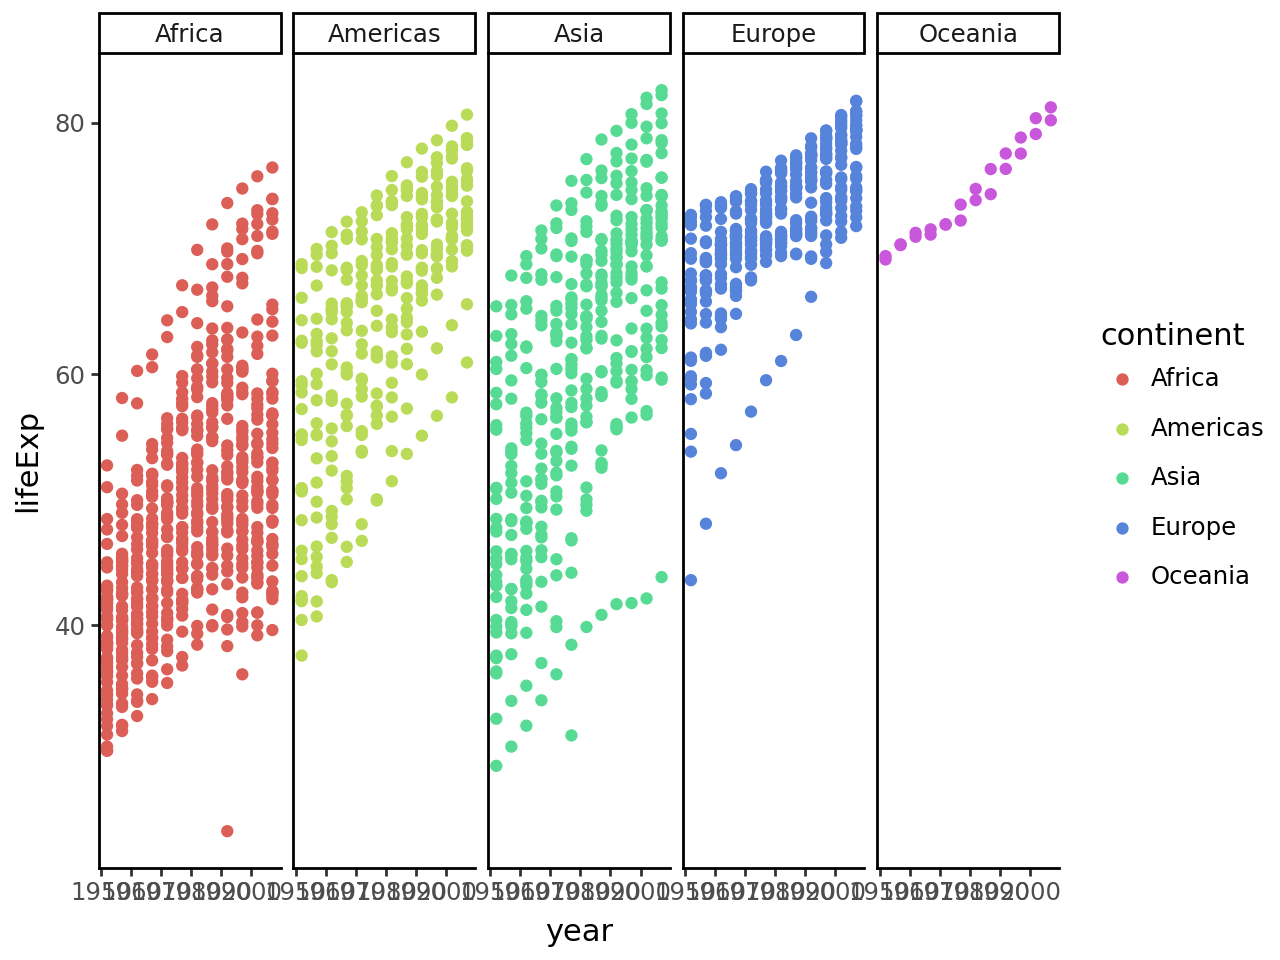

In [ ]:
(ggplot(gapminder)
  + aes(x="year", y="lifeExp", color="continent")
  + geom_point()
  + facet_wrap("continent", nrow=1)
  + theme_classic()
)

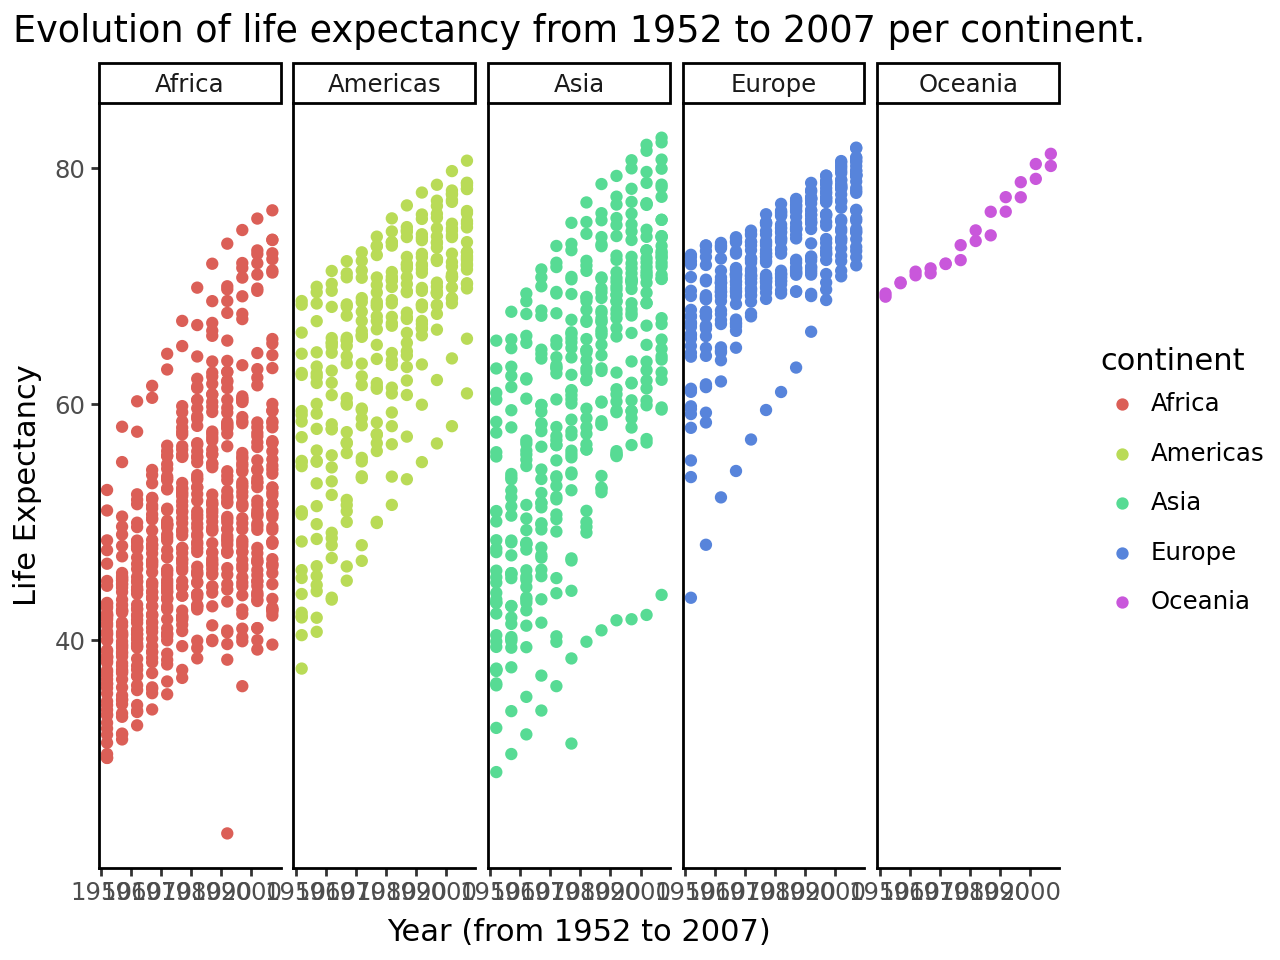

In [ ]:
(ggplot(gapminder)
  + aes(x="year", y="lifeExp", color="continent")
  + geom_point()
  + facet_wrap("continent", nrow=1)
  + labs(
      x="Year (from 1952 to 2007)",
      y="Life Expectancy",
      title="Evolution of life expectancy from 1952 to 2007 per continent."
  )
  + theme_classic()
)

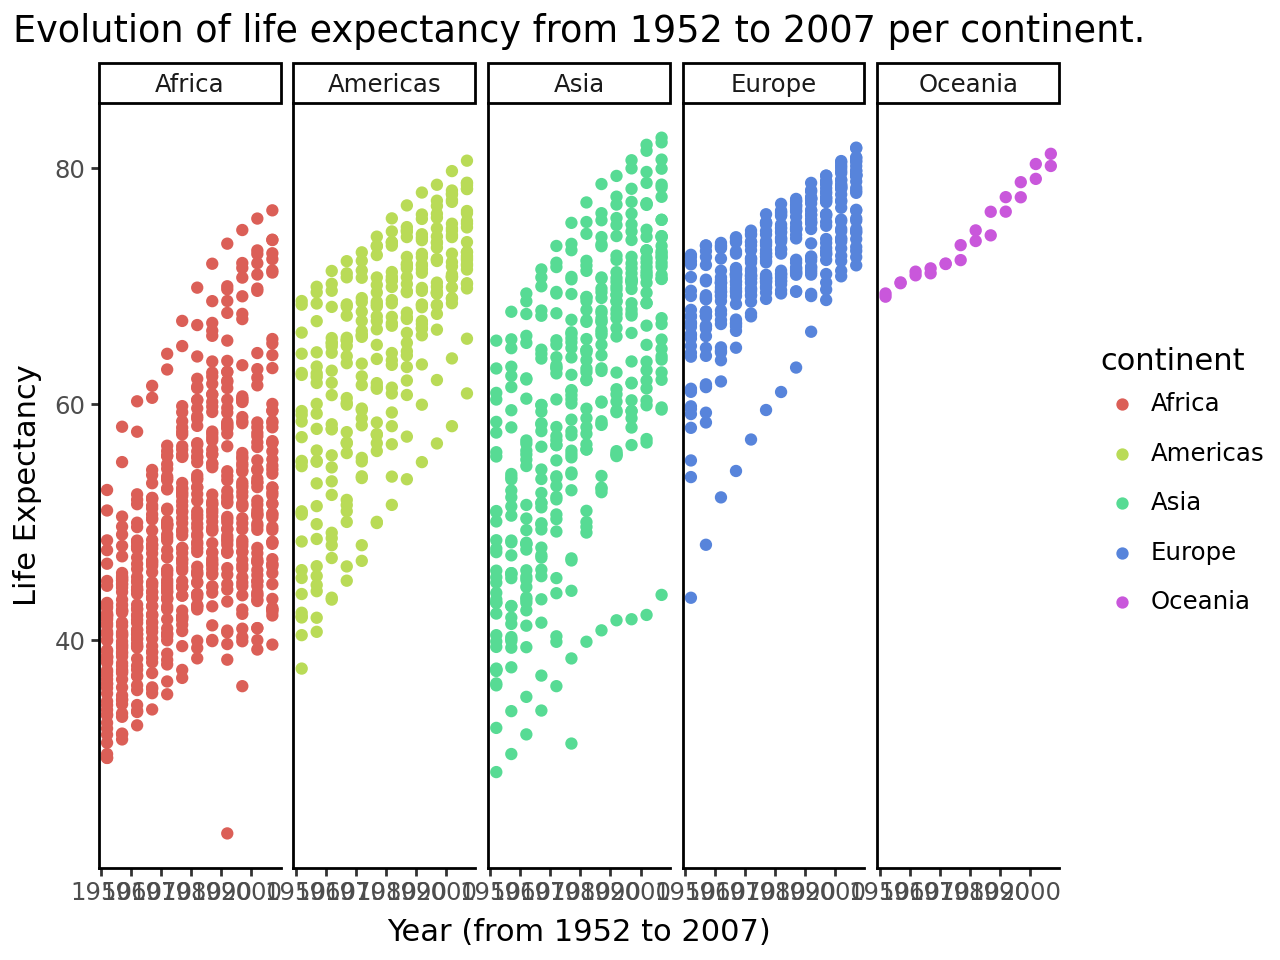

In [ ]:
(ggplot(gapminder)
  + aes(x="year", y="lifeExp", color="continent")
  + geom_point()
  + facet_wrap("continent", nrow=1)
  + labs(
      x="Year (from 1952 to 2007)",
      y="Life Expectancy",
      title="Evolution of life expectancy from 1952 to 2007 per continent."
  )
  + theme_classic()
)

/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


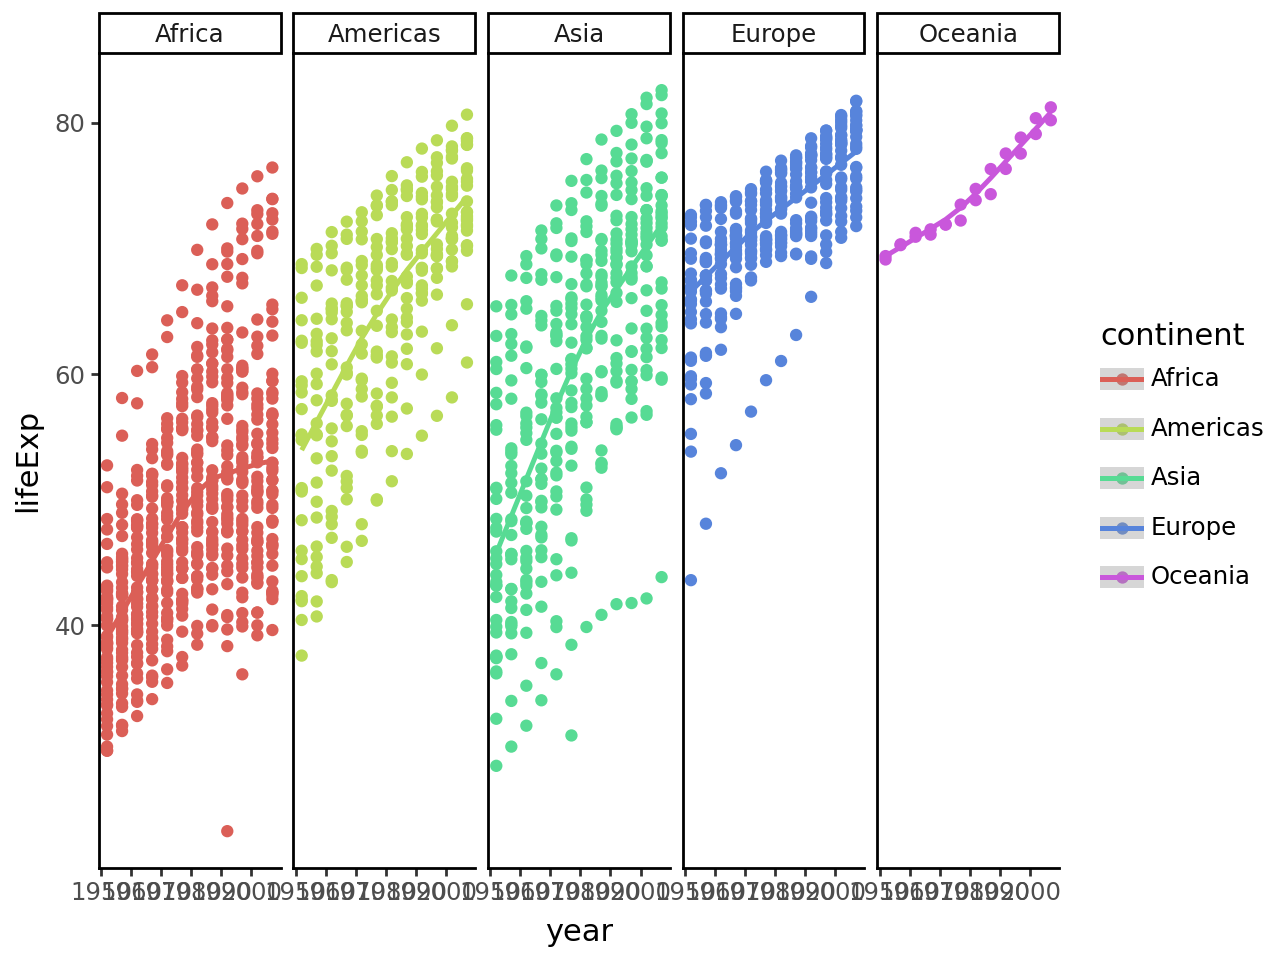

In [ ]:
(ggplot(gapminder)
  + aes(x="year", y="lifeExp", color="continent")
  + geom_point()
  + geom_smooth()
  + facet_wrap("continent", nrow=1)
  + theme_classic()
)


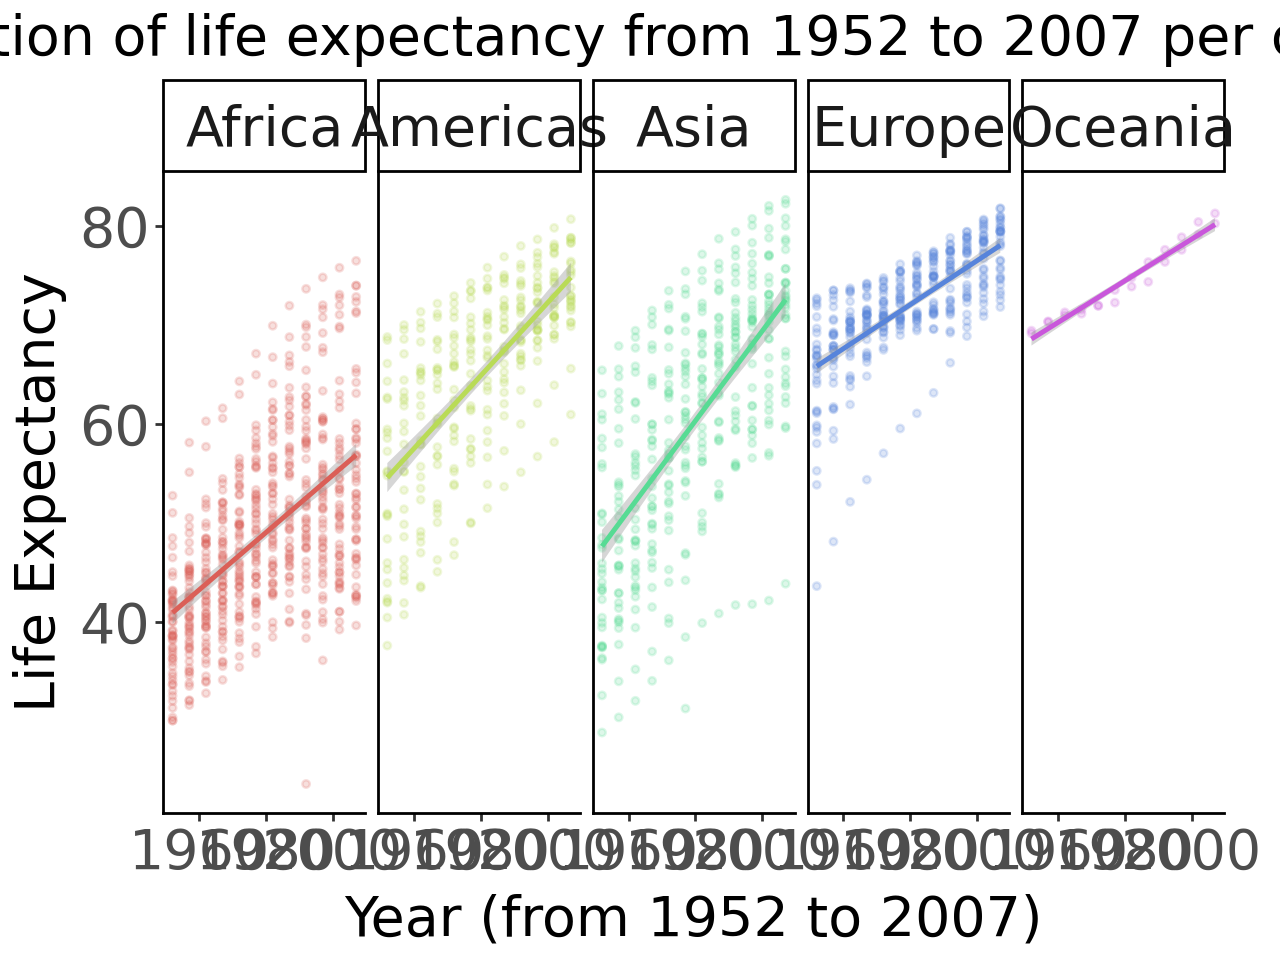

In [ ]:
(ggplot(gapminder)
  + aes(x="year", y="lifeExp", color="continent")
  + geom_point(alpha=0.2, size=1)
  + geom_smooth(method="lm")
  + facet_wrap("continent", nrow=1)
  + scale_x_continuous(breaks=[1960, 1980, 2000])
  + labs(
      x="Year (from 1952 to 2007)",
      y="Life Expectancy",
      title="Evolution of life expectancy from 1952 to 2007 per continent."
  )
  + theme_classic()
  + theme(text=element_text(size=20))
  + guides(color="none")
)

In [ ]:
import geopandas as gp

In [ ]:
shape_world = gp.read_file("https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp")

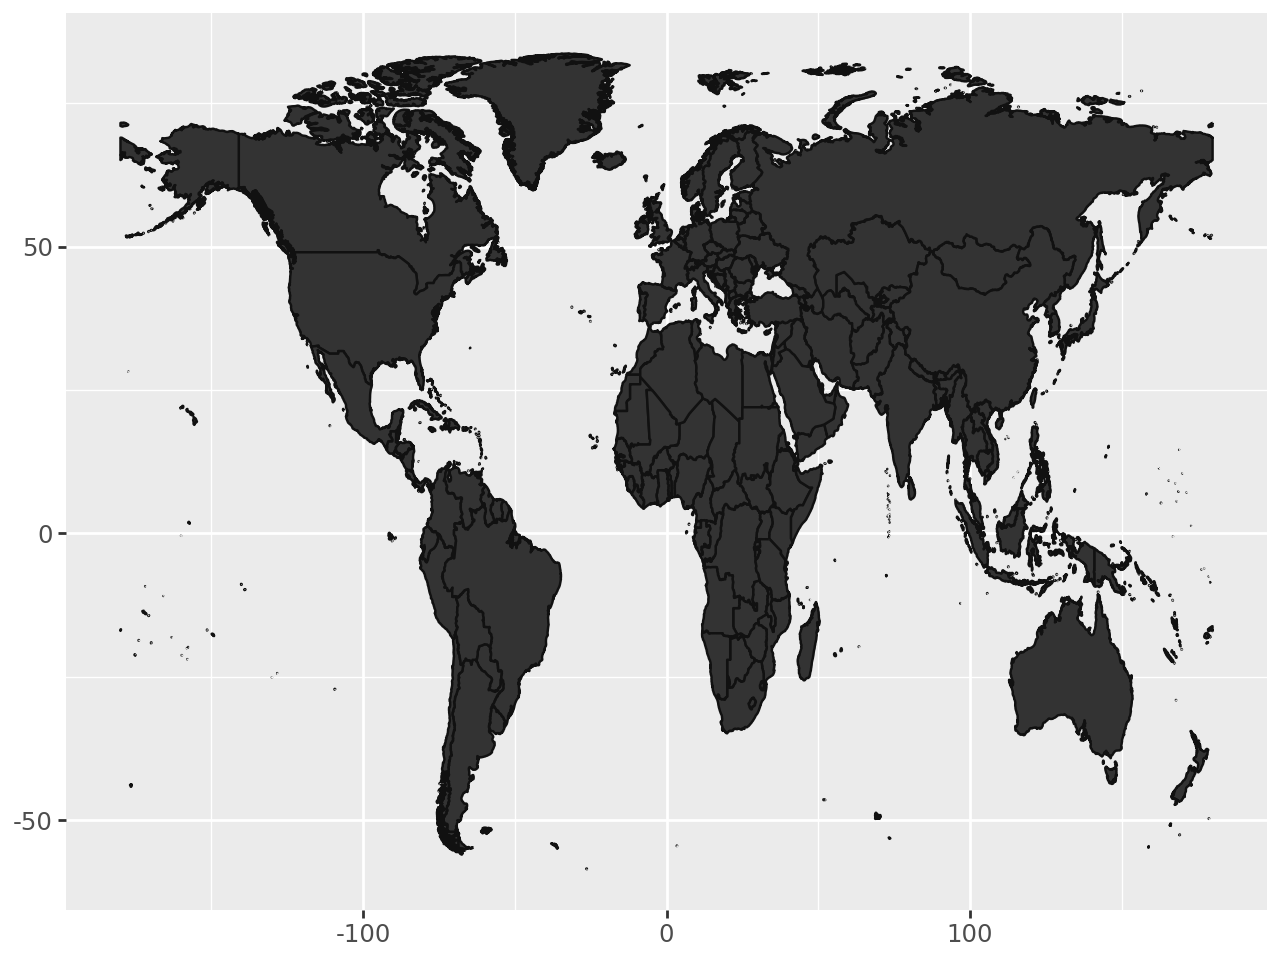

In [ ]:
(ggplot()
  + geom_map(shape_world)
)

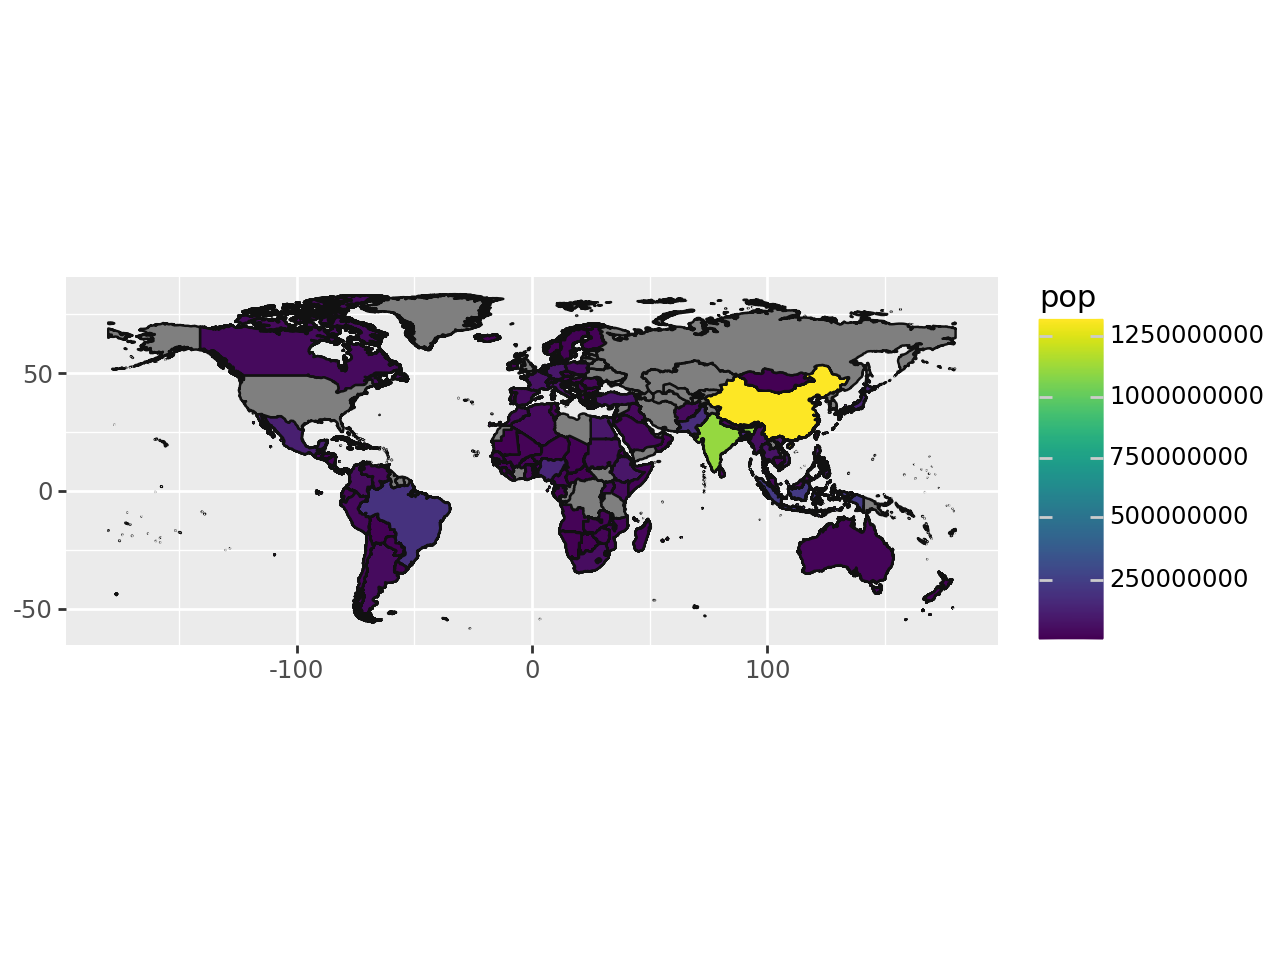

In [ ]:
pop_2007 = (gapminder
  .filter(pl.col("year") == 2007)
)
map_pop_2007 = (shape_world
  .merge(gapminder.to_pandas(), left_on="name", right_on="country", how="outer")
)
(ggplot(data=map_pop_2007)
  + aes(fill="pop")
  + geom_map()
  + coord_fixed()
)

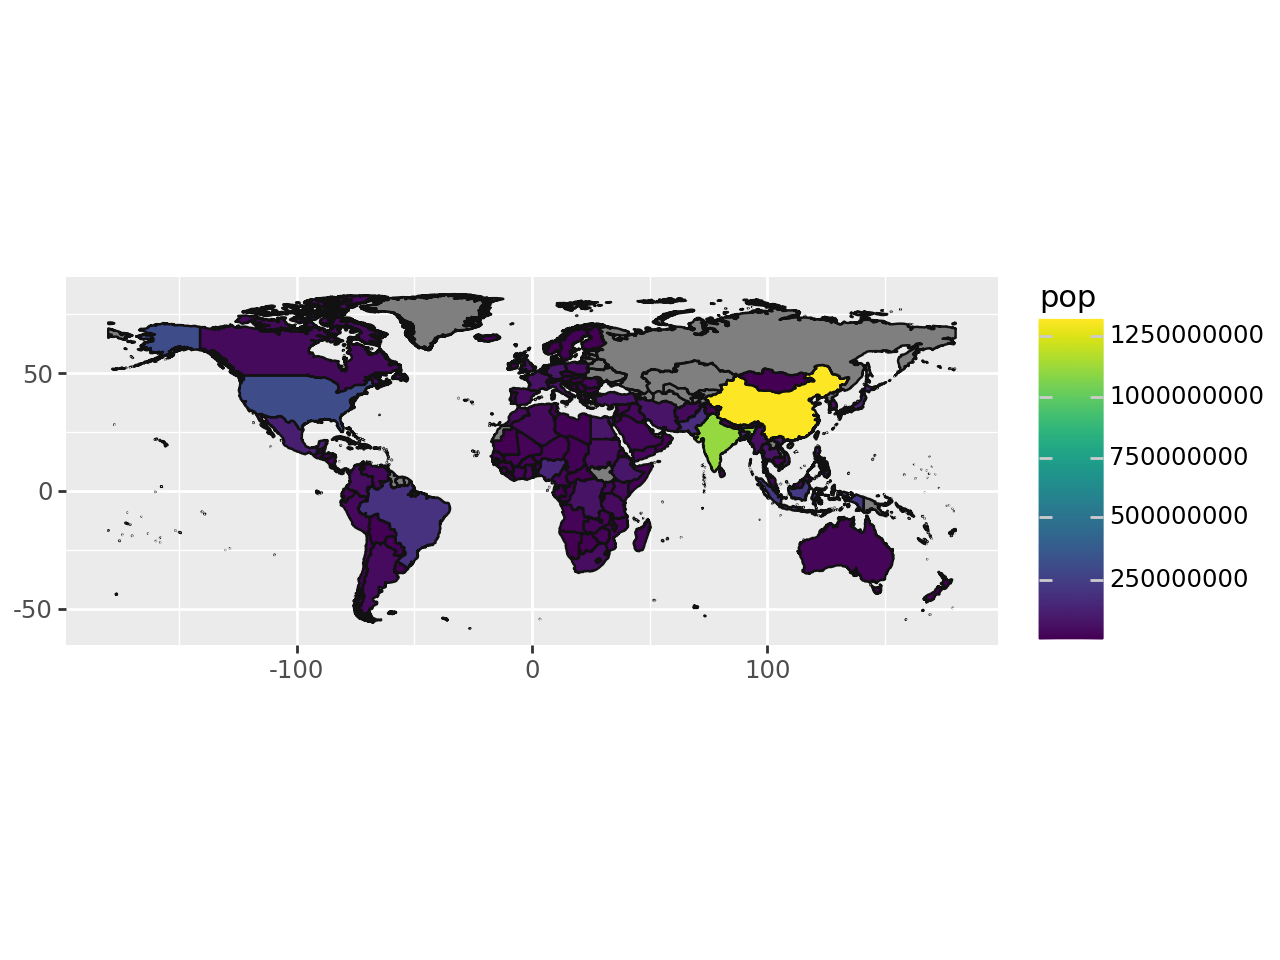

In [ ]:
# 1. Read the csv file containing the iso3 convention for all spellings
country_code = pl.read_csv("https://raw.githubusercontent.com/adrivsh/country_names/refs/heads/master/names_to_iso.csv")
# 2. Join country_code and gapminder to identify the iso3 code for each country
gapminder_code = (gapminder.join(country_code, on="country", how="left"))
# 3. Filter gapminder_code to have only values for 2007
gapminder_code_2007 = (gapminder_code.filter(pl.col("year") == 2007))
# 4. Merge the values with the shape file for each country using the iso3
shape_gapminder_code_2007 = (shape_world
  .merge(gapminder_code_2007.to_pandas(), on="iso3", how="outer")
)
# 5. Plot the map
(ggplot(data=shape_gapminder_code_2007)
  + aes(fill="pop")
  + geom_map()
  + coord_fixed()
)

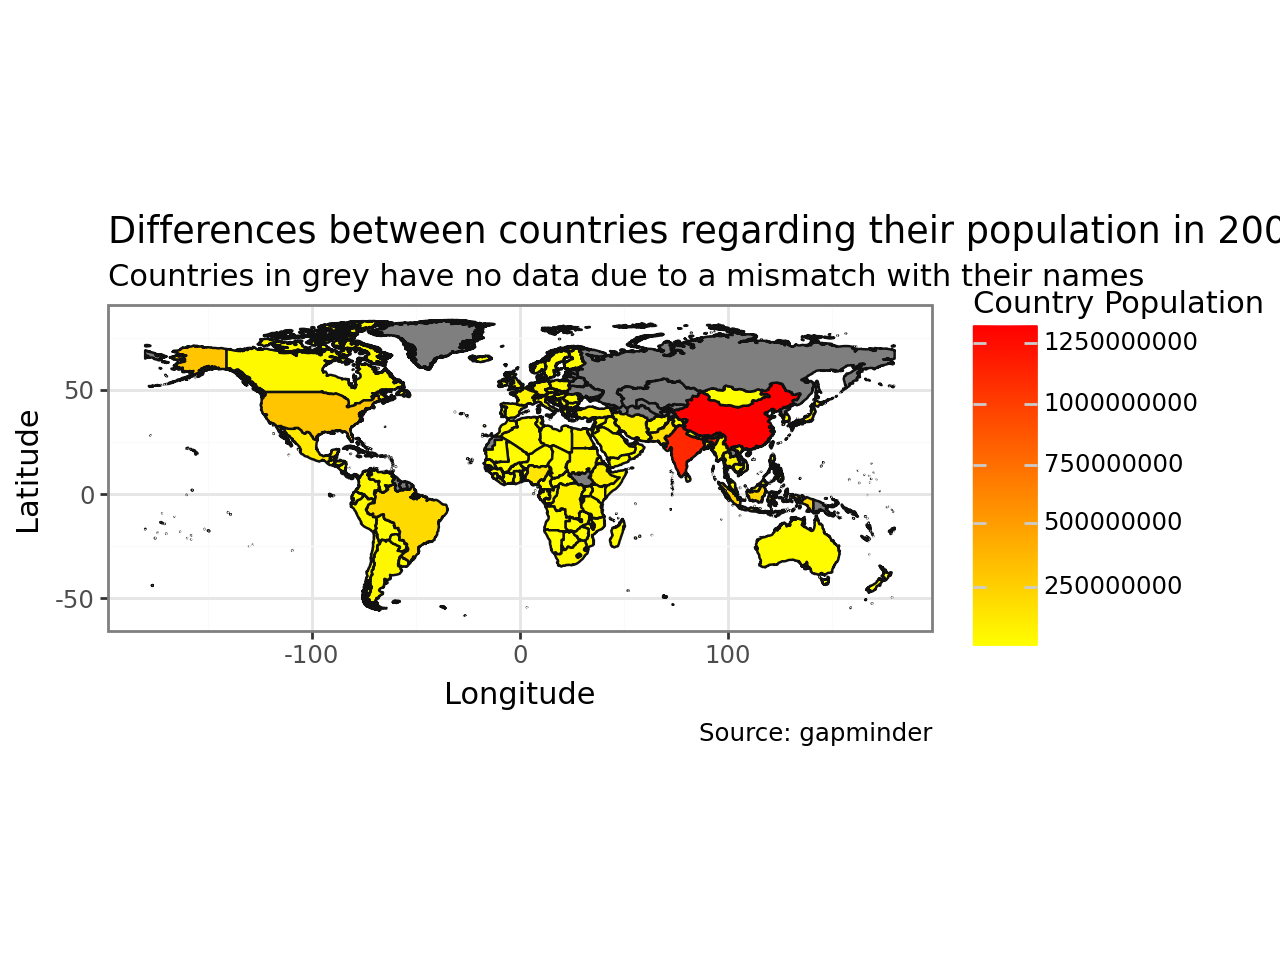

In [ ]:
(ggplot(data=shape_gapminder_code_2007)
  + aes(fill="pop")
  + geom_map()
  + scale_fill_gradient(low="yellow", high="red")
  + labs(
      title="Differences between countries regarding their population in 2007",
      subtitle="Countries in grey have no data due to a mismatch with their names",
      caption="Source: gapminder",
      x="Longitude",
      y="Latitude",
      fill="Country Population"
  )
  + coord_fixed()
  + theme_bw()
)

In [ ]:
(ggplot(_ _ _)
  + geom_map(shape_world)
  + geom_line(aes(country))
  + geom_smooth(aes(continent))
  + facet_wrap(_ _ _)
)

In [ ]:
(ggplot(gapminder)
  + geom_line(aes("year", "lifeExp", ground = "country"))
  + geom_smooth(aes("year", "lifeExp", colour = "continent"))
  + facet_wrap("continent")
  + theme_matplotlib
)

TypeError: theme.__radd__() missing 1 required positional argument: 'other'

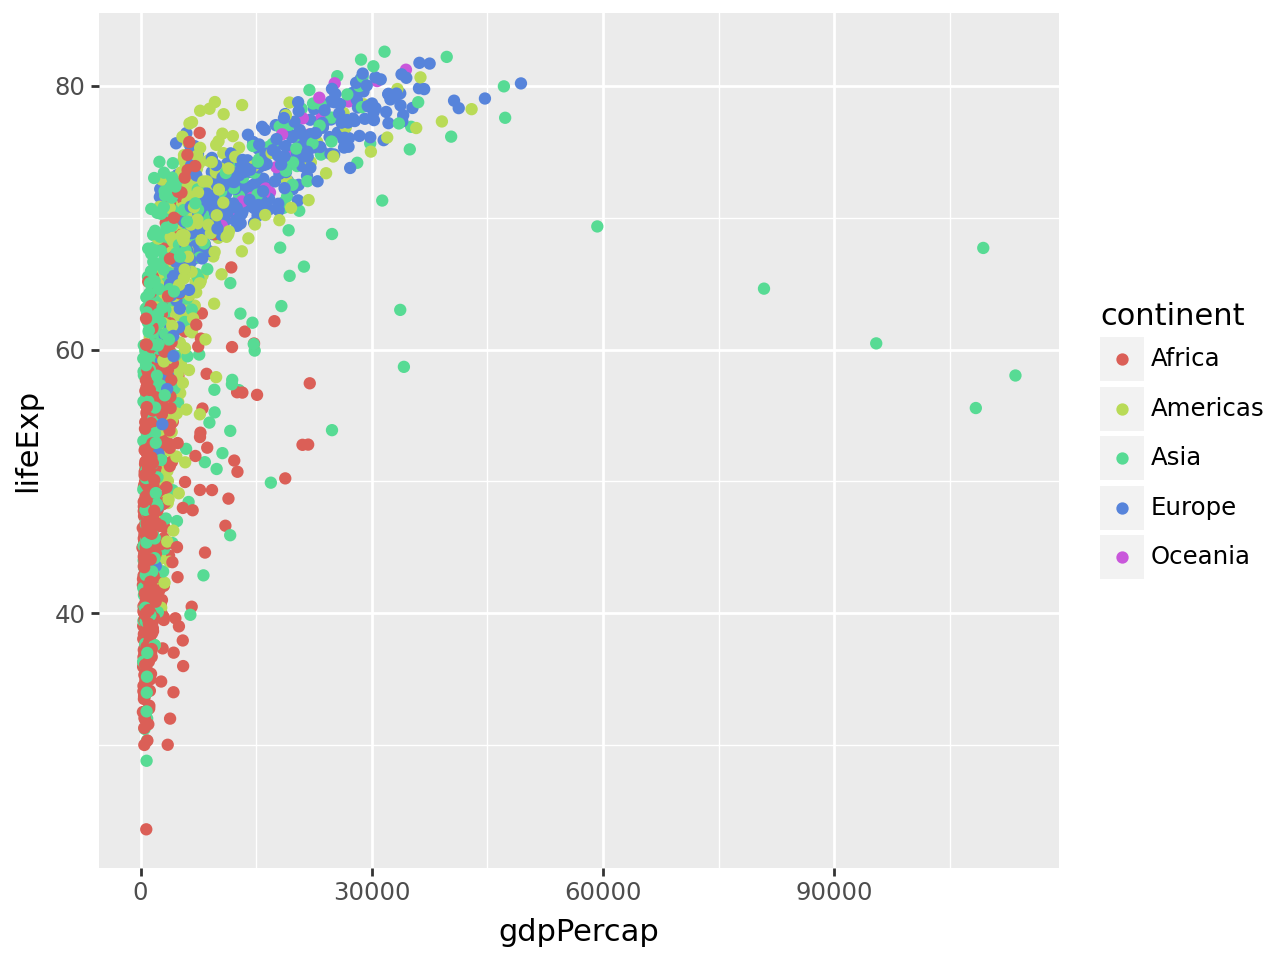

In [ ]:
# this classic representation:
(ggplot(data=gapminder)
  + aes(x="gdpPercap", y="lifeExp", color="continent")
  + geom_point()
)
# is the same as:
(gapminder
  >>
  ggplot()
  + aes(x="gdpPercap", y="lifeExp", color="continent")
  + geom_point()
)
# is the same as:
(gapminder
  >>
  ggplot(aes(x="gdpPercap", y="lifeExp", color="continent"))
  + geom_point()
)

In [ ]:
print("Hello Quarto")


Hello Quarto


In [ ]:
print("Hello Quarto")

Hello Quarto


In [ ]:
print("Hello Quarto")

Hello Quarto


In [ ]:
!pip install quarto-cli

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')